In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [3]:
from glob import glob
import os
import time

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from util.file_util import StockTwitsFileReader

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 150)

In [5]:
file_reader = StockTwitsFileReader()

In [6]:
date = '2019-08-09'
ticker = 'SHAK'

In [7]:
temp_df = file_reader.read_twit_file(ticker, date)

In [8]:
temp_df.head(2).T

,0,1
body,$SHAK CLDR Boys next call on Monday after the drop . One to look at anyways 👍,$SHAK new insider selling: 40987 shares. http://insiderbuyingselling.com/?t=SHAK
conversation.in_reply_to_message_id,NaN,NaN
conversation.parent,NaN,NaN
conversation.parent_message_id,NaN,NaN
conversation.replies,NaN,NaN
created_at,2019-08-10 03:46:47,2019-08-10 00:41:37
created_at_est,2019-08-09 23:46:47,2019-08-09 20:41:37
date_est,2019-08-09,2019-08-09
entities.chart.large,None,None
entities.chart.original,None,None


#### Lets Think about User information question later (for ex, is this user reliable?)
- For now, just focus on the message

In [9]:
COLS_OF_INTEREST = [
    'date_est',
    'created_at_est',
    'body',
    'symbols',
    'entities.sentiment.basic',
    'links',
]

In [10]:
sentiment_cols = [c for c in temp_df.columns if 'sentiment' in c]

In [11]:
temp_df[sentiment_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
entities.sentiment                                  0 non-null float64
entities.sentiment.basic                            22 non-null object
reshare_message.message.entities.sentiment          0 non-null float64
reshare_message.message.entities.sentiment.basic    0 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [12]:
temp_df_new = file_reader.read_twit_file(ticker, date, cols='default')

In [13]:
temp_df_new.head()

,date_est,created_at_est,body,symbols,entities.sentiment.basic,links
0,2019-08-09,2019-08-09 23:46:47,$SHAK CLDR Boys next call on Monday after the drop . One to look at anyways 👍,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9548}]",None,None
1,2019-08-09,2019-08-09 20:41:37,$SHAK new insider selling: 40987 shares. http://insiderbuyingselling.com/?t=SHAK,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9547}]",None,"[{'title': 'Tracking insider buying and selling stocks for Shake Shack Inc. ( SHAK )', 'url': 'http://insiderbuyingselling.com/?t=SHAK', 'shortene..."
2,2019-08-09,2019-08-09 20:14:08,$SHAK how is institutional ownership 106%? Educate me dont belittle me please.,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9547}]",None,None
3,2019-08-09,2019-08-09 19:56:51,"$SHAK So far Zach Koff was the insider who dumped at the highest price. If they are exercising their options and dumping them immediately, why are...","[{'id': 679, 'symbol': 'SPX', 'title': 'S&P 500 Index', 'aliases': [], 'is_following': False, 'watchlist_count': 42321}, {'id': 4979, 'symbol': 'D...",Bearish,None
4,2019-08-09,2019-08-09 19:26:32,$SHAK all these big dumps and price goes up? What gives?,"[{'id': 12378, 'symbol': 'SHAK', 'title': 'Shake Shack', 'aliases': [], 'is_following': False, 'watchlist_count': 9548}]",Bearish,None


## Read for time range

In [14]:
ticker = 'SHAK'

start_date = '2018-01-01'
end_date = '2019-08-01'

Problem - below takes too long, I should cache it

In [15]:
%%time

data_df = file_reader.read_twit_file_in_range(ticker, start_date, end_date, cols='default')

CPU times: user 37.9 s, sys: 349 ms, total: 38.2 s
Wall time: 38.7 s


In [16]:
data_df.shape

(8664, 6)

In [17]:
data_df['entities.sentiment.basic'].value_counts(dropna=False)

NaN        6554
Bearish    1067
Bullish    1043
Name: entities.sentiment.basic, dtype: int64

In [18]:
root_dir = file_reader.get_root_dir()
scrap_data_dir = os.path.join(root_dir, 'scrap_data')
scrap_data_dir

'/Users/seung-jae_bang/Personal/Research/Stock_Sentiment/data/Stocktwits/scrap_data'

In [ ]:
TICKER_LIST = [
    'SHAK',
    'MSFT',
    'TSLA',
    'SBUX'
]

In [ ]:
for t in tqdm(TICKER_LIST):
    df = file_reader.read_twit_file_in_range(t, start_date, end_date, cols='default')
    df.to_pickle(os.path.join(scrap_data_dir, 
                              '{ticker}_{start_date}_{end_date}.pkl'.format(ticker=t,
                                                                            start_date=start_date,
                                                                            end_date=end_date)))

In [ ]:
data_df.loc[data_df['entities.sentiment.basic'] == 'Bearish', 'body'].sample(10).to_frame()

In [ ]:
data_df.loc[data_df['entities.sentiment.basic'] == 'Bullish', 'body'].sample(10).to_frame()

## Summarize Stats

In [19]:
cache_file_format = '{ticker}_{start_date}_{end_date}.pkl'

In [20]:
data_dict = dict()

In [21]:
for t in TICKER_LIST:
    temp = pd.read_pickle(os.path.join(scrap_data_dir, 
                                       cache_file_format.format(ticker=t,
                                                                start_date=start_date,
                                                                end_date=end_date,)))
    temp['ticker'] = t
    data_dict[t] = temp

NameError: name 'TICKER_LIST' is not defined

In [ ]:
all_df = pd.concat(data_dict.values())

In [ ]:
n_days = all_df['date_est'].nunique()
n_days

Twit Count Stat

In [ ]:
count_df = all_df.groupby('ticker')['date_est'].count().to_frame('count')
count_df['count_per_day'] = (count_df['count'] / n_days).round(2)
count_df

In [ ]:
sentiment_count_df = all_df.groupby('ticker').apply(
    lambda x: x['entities.sentiment.basic'].value_counts(dropna=True)).reset_index()

sentiment_count_df.columns = ['ticker', 'sentiment_type', 'count']
sentiment_count_df = sentiment_count_df.pivot(
    index='ticker', columns='sentiment_type', values=['count'])

sentiment_count_df.columns = sentiment_count_df.columns.levels[1]
sentiment_count_df.columns.name = None
sentiment_count_df['total_sentiment_count'] = sentiment_count_df['Bearish'] + sentiment_count_df['Bullish']
sentiment_count_df

In [ ]:
count_df = count_df.merge(sentiment_count_df, left_index=True, right_index=True)
count_df['pct_sentiment'] = count_df['total_sentiment_count'] / count_df['count']
count_df

### Investigate Hyperlinks

In [ ]:
pd.set_option('display.max_colwidth', 500)

In [ ]:
def extract_link_info(row):
    temp = row['links'][0]
    return pd.Series(temp)

In [ ]:
link_df = all_df.dropna(subset=['links'])[['body', 'links']].sample(3)

In [ ]:
link_df.assign(**link_df.apply(extract_link_info, axis=1))[['body', 'title', 'url', 'description']]

#### Look at Labeled Samples

In [ ]:
N_SAMPLES = 4

In [ ]:
bullish_dfs = []
bearish_dfs = []

In [ ]:
all_bullish_df = all_df[all_df['entities.sentiment.basic'] == 'Bullish']
all_bearish_df = all_df[all_df['entities.sentiment.basic'] == 'Bearish']

In [ ]:
for _, df in all_bullish_df.groupby('ticker'):
    bullish_dfs.append(df[['body', 'ticker', 'entities.sentiment.basic']].sample(N_SAMPLES))
    
for _, df in all_bearish_df.groupby('ticker'):
    bearish_dfs.append(df[['body', 'ticker', 'entities.sentiment.basic']].sample(N_SAMPLES))

In [ ]:
bullish_df = pd.concat(bullish_dfs)
bearish_df = pd.concat(bearish_dfs)

In [ ]:
bearish_df

#### Bullish / Bearish Counts

In [24]:
import matplotlib.dates as md
from matplotlib.dates import date2num

In [25]:
STOCK_DATA_DIR = '/Users/seung-jae_bang/Personal/Research/Stock_Sentiment/data/AlphaVantage/scrap'

In [26]:
ticker = 'MSFT'

In [27]:
stock_df = pd.read_pickle(os.path.join(STOCK_DATA_DIR,
                                       'stock_price_{}.pkl'.format(ticker)))

In [28]:
stock_df = stock_df.loc['2018-01-01':'2019-08-10', ['close']]

In [29]:
shak_df = pd.read_pickle(os.path.join(scrap_data_dir, 
                                      cache_file_format.format(ticker=ticker,
                                                               start_date=start_date,
                                                               end_date=end_date,)))

shak_df['date_est'] = pd.to_datetime(shak_df['date_est'])
shak_df = shak_df.dropna(subset=['entities.sentiment.basic'])

In [30]:
shak_df = shak_df.groupby('date_est').apply(
    lambda d: d['entities.sentiment.basic'].value_counts()).to_frame('count').reset_index()

In [31]:
shak_df = shak_df.pivot(index='date_est', columns='level_1', values='count').fillna(0)

In [32]:
shak_df['Bearish'] = shak_df['Bearish'].astype(int)
shak_df['Bullish'] = shak_df['Bullish'].astype(int)

shak_df = shak_df.sort_index()

In [33]:
shak_weely_df = shak_df.resample('W-FRI').sum()

In [35]:
num_dates = date2num(shak_weely_df.index)

In [ ]:
𝛼=1−𝑒𝑥𝑝(𝑙𝑜𝑔(0.5)/ℎ𝑎𝑙𝑓𝑙𝑖𝑓𝑒)

In [38]:
np.log(0.5)

NameError: name 'np' is not defined

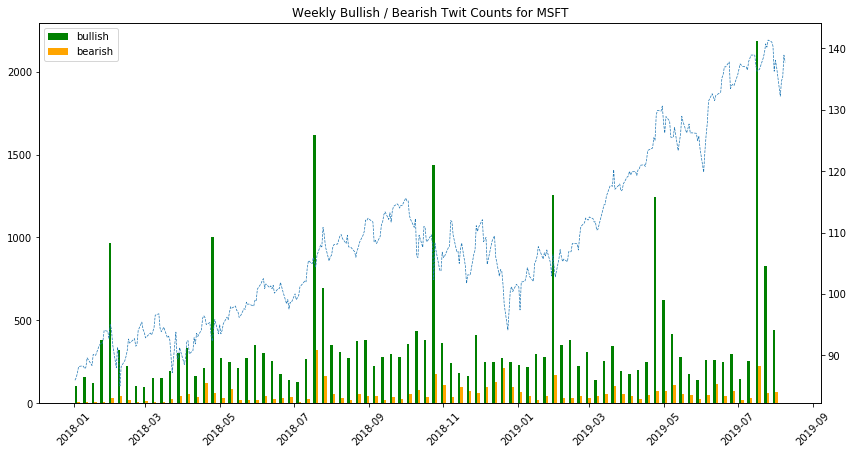

In [37]:
myFmt = md.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(14, 7))
# shak_weely_df.plot(kind='bar', ax=ax)
b1 = ax.bar(num_dates - 2, shak_weely_df['Bullish'], label='bullish', color='g', width=2, align='center')
b2 = ax.bar(num_dates, shak_weely_df['Bearish'], label='bearish', color='orange', width=2, align='center')

# Set major x ticks on Mondays.
ax.xaxis.set_major_locator(
#     matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO)
    matplotlib.dates.MonthLocator()
)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)

ax2 = ax.twinx()
l1 = ax2.plot(stock_df.index, stock_df['close'], linewidth=0.7, linestyle='--')

ax.legend('upper right', handles=[b1, b2])
plt.title('Weekly Bullish / Bearish Twit Counts for {}'.format(ticker))
plt.show()

In [ ]:
myFmt = md.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(14, 7))
shak_weely_df.plot(kind='bar', ax=ax)

In [ ]:
ax.xaxis.get_major_formatter()

In [ ]:
shak_weely_df.plot(kind='bar')